# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [40]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [19]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [20]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


# 1.What test is appropriate for this problem? Does CLT apply?
Since it's comparing the success rate of black-sounding and white-sounding, the sample sizes are large enough, we can use z test on the proportions in this case.
# 2.What are the null and alternate hypotheses?
Null hypothesis: The proportions of callbacks in black-soundings and white-soundings are the same

Alternative hypothesis: White-soundings have the higher rate of callback

# 3.Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

In [21]:
sum(data[data.race=='w'].call)

235.0

In [22]:
w = data[data.race=='w']
b = data[data.race=='b']
len(w),len(b)

(2435, 2435)

In [34]:
# Bootstrap
# total callback rate
p = (sum(data[data.race=='w'].call)+sum(data[data.race=='b'].call))/ len(data)
# standard deviation
sigma = np.sqrt(2*p*(1-p)/2435)
p, sigma

(0.08049281314168377, 0.007796894036170457)

In [37]:
# 99% CI z score 2.58
# margin of error
mor = 2.58 * sigma
CI_upper = (sum(data[data.race=='w'].call)/len(w) - sum(data[data.race=='b'].call)/len(b)) + mor
CI_lower = (sum(data[data.race=='w'].call)/len(w) - sum(data[data.race=='b'].call)/len(b)) - mor
# Z statistic
z_stat = (sum(data[data.race=='w'].call)/len(w) - sum(data[data.race=='b'].call)/len(b))/sigma
z_stat

4.108412152434346

In [38]:
if z_stat > 2.58:
    print('Reject null hypothesis. The rate of white-sounding is higher than black-sounding')
else:
    print('Fail to reject null hypothesis')

Reject null hypothesis. The rate of white-sounding is higher than black-sounding


In [28]:
# two-sample proportion z test
alpha = 0.01
b_w = np.array([157,235])
samp_num = np.array([2435,2435])
stat, pval = proportions_ztest(b_w,samp_num)
stat, pval

(-4.108412152434346, 1.9919434187925383e-05)

In [31]:
if pval > alpha:
    print('p-value '+str(pval)+" > "+'alpha '+str(alpha)+': Fail to reject null hypothesis.It is more likely that black-sound and white-sound have the same rate of call back')
else:
    print('p-value '+str(pval)+" < "+'alpha '+str(alpha)+': Reject null hypohesis. Black-sound is likely to have lower callback rate' )

p-value 1.9919434187925383e-05 < alpha 0.01: Reject null hypohesis. Black-sound is likely to have lower callback rate


D:\PythonAnaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


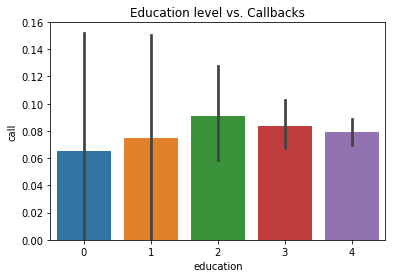

In [43]:
ec = data[['education','call']]
sns.barplot(x="education",y="call",data=ec)
plt.title("Education level vs. Callbacks")
plt.show()

D:\PythonAnaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


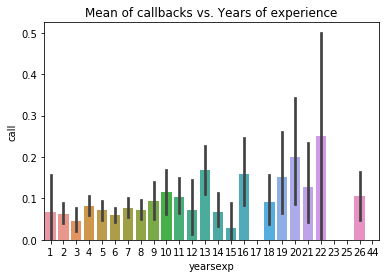

In [44]:
sns.barplot(x="yearsexp",y="call",data=data)
plt.title("Mean of callbacks vs. Years of experience")
plt.show()

D:\PythonAnaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


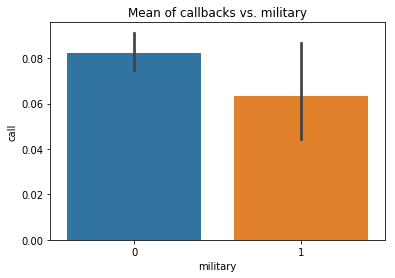

In [45]:
sns.barplot(x="military",y="call",data=data)
plt.title("Mean of callbacks vs. military")
plt.show()

D:\PythonAnaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


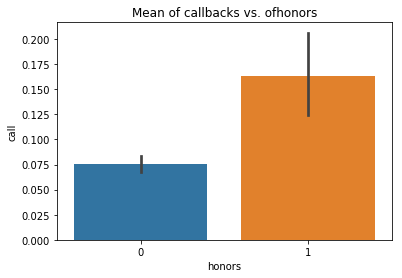

In [47]:
sns.barplot(x="honors",y="call",data=data)
plt.title("Mean of callbacks vs. ofhonors")
plt.show()

As we can see from the charts above, different condition can have significant influence on the callback rate.

Higher education level,longer years of experience, non-military experience and more honors have increase the rate of callback.

Black-sounding or white-sounding can only be a superficial factor that influence the callback rate. As far as I'm concerned, the comprehensive reasons behind the races are more important to the call backrate.

If we want to build a more in-depth analysis on how race influences the callback rate, we should conduct analysis like propensity score matching ahead to eliminate bias from other significant factors